Mount the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install All Libraries

In [ ]:
!pip install face_recognition
!pip install moviepy
!pip install ffmpeg


     |████████████████████████████████| 100.1 MB 20 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=b1b847c5c517af148d04e93034565812bdd5ea15369a1d6de88d251eeba2322d
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=4a5156e189286112ae3d8d6828be101935cd9ea15222b96dcb1feca012c8e984
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg


In [ ]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os
import moviepy.editor as mp

 


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1794048/45929032 bytes (3.9%)4882432/45929032 bytes (10.6%)8118272/45929032 bytes (17.7%)11313152/45929032 bytes (24.6%)14475264/45929032 bytes (31.5%)17661952/45929032 bytes (38.5%)20537344/45929032 bytes (44.7%)23330816/45929032 bytes (50.8%)26509312/45929032 bytes (57.7%)29720576/45929032 bytes (64.7%)33046528/45929032 bytes (72.0%)36364288/45929032 bytes (79.2%)

Use the pickle library to get the face encodings dictionary of the actors

In [ ]:
import pickle
data = pickle.load(open("/content/drive/MyDrive/LinkedIn/Welcome/welcome_data.pkl", "rb"))


In [ ]:
!mkdir Test

Get the input video

Defined a function to get frames from the video and store them in the Test folder

In [ ]:
import cv2


vidcap = cv2.VideoCapture('/content/Welcome.mp4')


def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("/content/drive/MyDrive/LinkedIn/Welcome/Test/image"+str(count)+".jpg", image)     # save frame as JPG file
        
    return hasFrames


Get the Frames by specifying the parameters.

In [ ]:
%%time
sec = 0
fpssss = 30
frameRate = 1/ fpssss #//it will capture image in each 1/30 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)


CPU times: user 1h 46min 34s, sys: 1min 57s, total: 1h 48min 31s
Wall time: 1h 5min 20s


In [ ]:
frameRate

0.03333333333333333

Sort the image names

In [ ]:
import re
def sorted_aphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

Store the sorted image names in a variable called imgs

In [ ]:
import os

imgs = []
for files in sorted_aphanumeric (os.listdir('/content/drive/MyDrive/LinkedIn/Welcome/Test')):
  #print(files)
  imgs.append('/content/drive/MyDrive/LinkedIn/Welcome/Test/'+files)

In [ ]:
len(imgs)

6004

In [ ]:
imgs

['/content/drive/MyDrive/LinkedIn/Welcome/Test/image1.jpg',
 '/content/drive/MyDrive/LinkedIn/Welcome/Test/image2.jpg',
 '/content/drive/MyDrive/LinkedIn/Welcome/Test/image3.jpg',
 '/content/drive/MyDrive/LinkedIn/Welcome/Test/image4.jpg',
 '/content/drive/MyDrive/LinkedIn/Welcome/Test/image5.jpg',
 '/content/drive/MyDrive/LinkedIn/Welcome/Test/image6.jpg',
 '/content/drive/MyDrive/LinkedIn/Welcome/Test/image7.jpg',
 '/content/drive/MyDrive/LinkedIn/Welcome/Test/image8.jpg',
 '/content/drive/MyDrive/LinkedIn/Welcome/Test/image9.jpg',
 '/content/drive/MyDrive/LinkedIn/Welcome/Test/image10.jpg',
 '/content/drive/MyDrive/LinkedIn/Welcome/Test/image11.jpg',
 '/content/drive/MyDrive/LinkedIn/Welcome/Test/image12.jpg',
 '/content/drive/MyDrive/LinkedIn/Welcome/Test/image13.jpg',
 '/content/drive/MyDrive/LinkedIn/Welcome/Test/image14.jpg',
 '/content/drive/MyDrive/LinkedIn/Welcome/Test/image15.jpg',
 '/content/drive/MyDrive/LinkedIn/Welcome/Test/image16.jpg',
 '/content/drive/MyDrive/LinkedIn

 
*   Import the relevant libraries.

*   Create a list called img_array which stores all the output images
 
*   Take an image from the frames we created.

*   Get face encodings for any people in the picture.

*   Loop over the facial embeddings incase we have multiple embeddings for multiple faces.


*  Compare encodings with encodings in data["encodings"]
    
*  Matches contain array with boolean values and True for the embeddings it matches closely and False for rest.

*  Set name = unknown if no encoding matches.


*  Check to see if we have found a match.

*  Find positions at which we get True and store them.

*  Loop over the matched indexes and maintain a count for each recognized face face.
      

*   Check the names at respective indexes we stored in matchedIdxs and
increase count for the name we got.
 

*   Set name which has highest count.

*   Update the list of names.


*   Load the image into a Python Image Library object so that we can draw on top of it and display it.
 


*   Draw a box around the face.

*   Store the output image in img_array.

*   Repeat it for every image in imgs chronologically.

















In [ ]:
%%time
import face_recognition
import imutils
import pickle
import time
import cv2
import os
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont, ImageDraw, Image
import numpy

img_array = []
for i in range(len(imgs)):
  Path_to_img = imgs[i]


  # Load the image we want to check
  unknown_image = face_recognition.load_image_file(Path_to_img)

  # Get face encodings for any people in the picture
  face_locations = face_recognition.face_locations(unknown_image, number_of_times_to_upsample=2)
  encodings = face_recognition.face_encodings(unknown_image, known_face_locations=face_locations)

  names = []
  # loop over the facial embeddings incase we have multiple embeddings for multiple faces
  for encoding in encodings:
    #Compare encodings with encodings in data["encodings"]
    #Matches contain array with boolean values and True for the embeddings it matches closely and False for rest
    matches = face_recognition.compare_faces(data["encodings"],
    encoding, tolerance=0.6)
    #set name =unknown if no encoding matches
    
    # check to see if we have found a match
    if True in matches:
      #Find positions at which we get True and store them
      matchedIdxs = [i for (i, b) in enumerate(matches) if b]
      counts = {}
      # loop over the matched indexes and maintain a count for
      # each recognized face face
      for i in matchedIdxs:
          #Check the names at respective indexes we stored in matchedIdxs
          name = data["names"][i]
          #increase count for the name we got
          counts[name] = counts.get(name, 0) + 1
          #set name which has highest count
          name = max(counts, key=counts.get)
    else:
      name = 'Unknown'    


    # update the list of names
    names.append(name)

    # Load the image into a Python Image Library object so that we can draw on top of it and display it
  pil_image = Image.fromarray(unknown_image)

  for count,face_location in enumerate(face_locations):
      # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
      top, right, bottom, left = face_location
      
      # Let's draw a box around the face
      fontsize = 22
      font = ImageFont.truetype("/content/drive/MyDrive/LinkedIn/arial.ttf", size=fontsize)
      if len(names) != 0:
        draw = ImageDraw.Draw(pil_image)
        draw.rectangle([left, top, right, bottom], outline="red")
        draw.text(((right+left)/2,bottom), names[count], font=font, fill=(255,255,255,255))
  open_cv_image = numpy.array(pil_image) 
  open_cv_image = open_cv_image[:, :, ::-1].copy() 
              
  img_array.append(open_cv_image)  

Here is an example of a random Input image and its Output image.

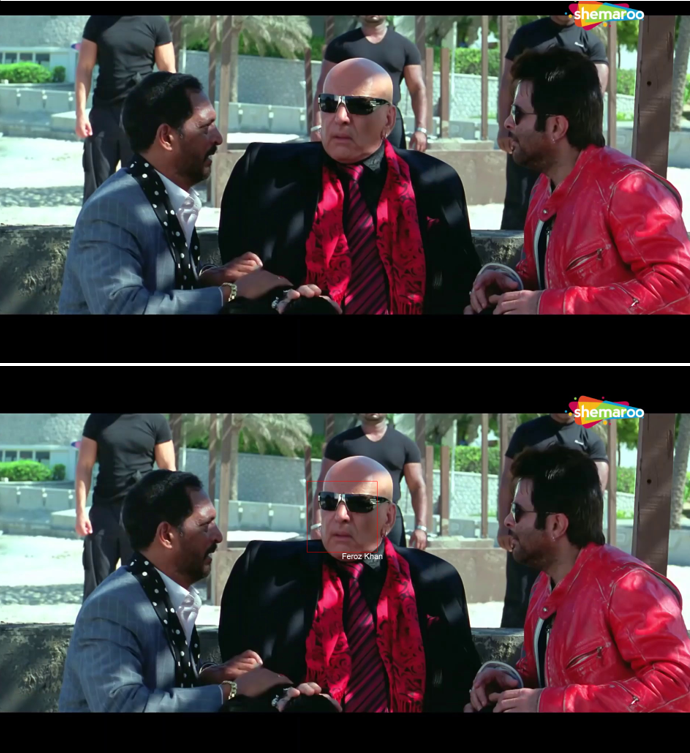



In [ ]:
len(img_array)

6004

In [ ]:
size = pil_image.size

Use VideoWriter to combine all the images in imgs to create the output video.

To keep the output video length same as the input video, use the same frame rate.




In [ ]:
out = cv2.VideoWriter('/content/drive/MyDrive/LinkedIn/Welcome/Test/project.mp4',cv2.VideoWriter_fourcc(*'DIVX'), fpssss, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

Extract Audio from the Input video. 

In [ ]:
# Extract Audio
video = mp.VideoFileClip(r"/content/Welcome.mp4") #here sample.mp4 is the name of video clip. 'r' indicates that we are reading a file
video.audio.write_audiofile(r"output.mp3")  #Here 'output.mp3' is the name of the audio file


[MoviePy] Writing audio in output.mp3


100%|██████████| 3308/3308 [00:02<00:00, 1170.91it/s]

[MoviePy] Done.


Add it to the Output file.

In [ ]:
#Add Audio
# Import everything needed to edit video clips
from moviepy.editor import *
  
# loading video dsa gfg intro video
clip = VideoFileClip("/content/project.mp4")
     
# loading audio file
audioclip = AudioFileClip("/content/output.mp3")
  
# adding audio to the video clip
videoclip = clip.set_audio(audioclip)
  
# showing video clip
videoclip.ipython_display()